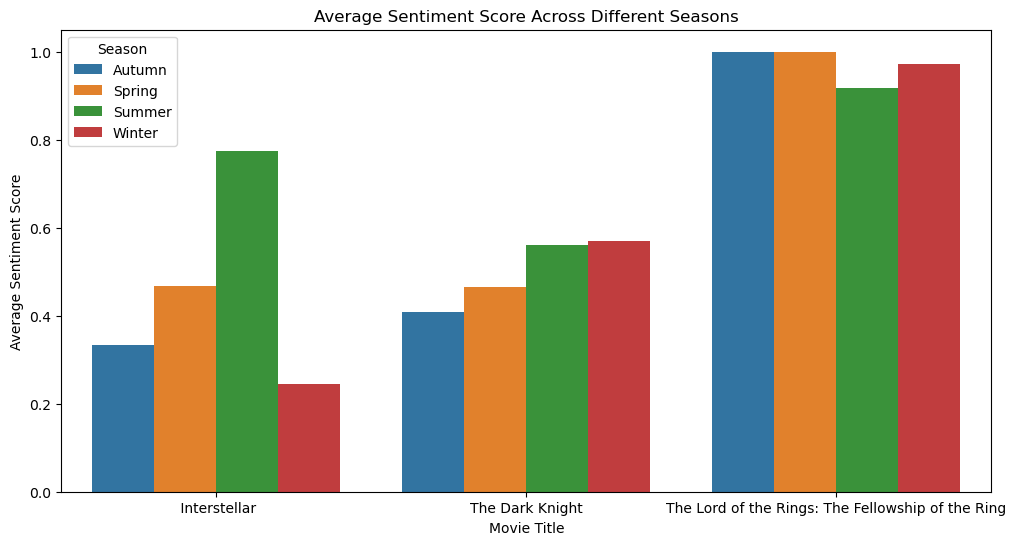

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Read the data
data = pd.read_excel('/users/IR/IMDBMovies.xlsx')

# Parse the Review_Date field into separate year and month columns
data['Review_Date'] = pd.to_datetime(data['Review_Date'])
data['Year'] = data['Review_Date'].dt.year
data['Month'] = data['Review_Date'].dt.month

# Assign a season to each month
data['Season'] = data['Month'].apply(get_season)

# Calculate the sentiment score for each review
data['Sentiment_Score'] = data['Review_Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Analysis 1: Sentiment Score Distribution Across Different Seasons

# Group the data by Movie_Title and Season, and calculate the average sentiment score for each group
season_grouped = data.groupby(['Movie_Title', 'Season'])['Sentiment_Score'].mean().reset_index()

# Create a bar plot to visualize the average sentiment score across different seasons
plt.figure(figsize=(12, 6))
sns.barplot(x='Movie_Title', y='Sentiment_Score', hue='Season', data=season_grouped)
plt.xlabel('Movie Title')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score Across Different Seasons')
plt.show()
